<font size=6><b>Lec01. pima DL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Data Load

In [2]:
df = pd.read_csv('./dataset/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 모델

In [5]:
from tensorflow.keras.models import Sequential

<pre>
Sequential( [_____, _____, _____, _____] )

또는

model = Sequential()
model.add(_____)
model.add(_____)
model.add(_____)
model.add(_____)

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

<pre>
tf.keras.layers.Dense(
<b><font color=red>
    units,   ----------------------------------- * output 수
    activation=None,  -------------------------- * 활성함수
    input_dim, --------------------------------- * input 수
</font></b>    
    use_bias=True,    -------------------------- wx+ b
    bias_initializer="zeros",  -----------------   + 0 
    bias_regularizer=None,
    bias_constraint=None,
    
    kernel_initializer="glorot_uniform",  ------ w초기화
    kernel_regularizer=None,  ------------------ w초기화
    kernel_constraint=None,
    activity_regularizer=None,
    
    **kwargs
)

In [7]:
df.shape

(768, 9)

In [8]:
# model = Sequential()
# d1 = Dense()
# d2 = Dense()
# d3 = Dense()

# model.add(d1)
# model.add(d2)
# model.add(d3)

model = Sequential()
model.add(Dense(units=12,  activation='relu',  input_dim=8))   #--------------- input_dim == 피쳐갯수
model.add(Dense(units=20 , activation='relu'))
model.add(Dense(units=40 , activation='relu'))
model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=80 , activation='relu'))
model.add(Dense(units=60 , activation='relu'))
model.add(Dense(units=20 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1 , activation='sigmoid'))              #--------------- 이진분류
# model.add(Dense(units=3 , activation='somtmax'))              #--------------- 멀티분류
# model.add(Dense(units=1 ))                                    #--------------- 회귀

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 20)                260       
                                                                 
 dense_2 (Dense)             (None, 40)                840       
                                                                 
 dense_3 (Dense)             (None, 120)               4920      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 80)                9680      
                                                                 
 dense_5 (Dense)             (None, 60)                4

# 모델 컴파일

<pre>
Model.compile(
<b><font color=red>
    optimizer="rmsprop",   #---------------역전파 수행 시 W(가중치)를 최적화
    loss=None,             #---------------손실함수가 계산한 (Y - Y^) 차이값
    metrics=None,          #------ 모델의 예측력 평가점수
</b></font>
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)

In [10]:
model.compile(optimizer='adam',            #------ 역전파 수행 시 W(가중치)를 최적화
            loss='binary_crossentropy',    #------ 손실값
            metrics=['accuracy'])          #------ 모델의 예측력 평가점수

# 평가 메트릭스
* ref: https://keras.io/api/metrics/

<pre>
Accuracy metrics
    Accuracy class
Probabilistic metrics
    BinaryCrossentropy class
    CategoricalCrossentropy class
    SparseCategoricalCrossentropy class
Regression metrics
    MeanSquaredError class
    RootMeanSquaredError class
    CosineSimilarity class
Classification metrics 
    AUC class
    Precision class
    Recall class
    TruePositives class
    TrueNegatives class
    FalsePositives class
    FalseNegatives class

<pre>
tf.keras.metrics.Accuracy(name="accuracy", dtype=None)


def my_score(y_test, pred):
    residuql = np.square(y_test, pred)
    return np.sqrt(residuql)  # RMSE
    
model.compile(optimizer='adam',            
            loss='binary_crossentropy',    
            <b><font color=red>
            metrics='accuracy')    --------주의 [  ]
            metrics=['accuracy', 'recall'])             
            metrics=[tensorflow.keras.metrics.Accuracy(),  tensorflow.keras.metrics.Recall()]
            metrics=[my_score]
            </font><b>
            )

# 문제지 답안지 분리

In [11]:
from sklearn.model_selection import train_test_split
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234,  shuffle=False)
print(X_train.shape, X_val.shape)

(614, 8) (154, 8)


# 모델학습 & 평가

In [12]:
fit_res = model.fit(X_train, y_train 
                  #, batch_size=15
                  , epochs=10
                  , validation_data=(X_val, y_val)
                 )

loss, accuracy_score = model.evaluate(X_val, y_val)
print(f"accuracy : {accuracy_score}")

Epoch 1/10
20/20 [==============================] - 1s 17ms/step - loss: 1.3109 - accuracy: 0.5537 - val_loss: 0.7464 - val_accuracy: 0.4026
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.8538 - accuracy: 0.5179 - val_loss: 0.6880 - val_accuracy: 0.5584
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7129 - accuracy: 0.5749 - val_loss: 0.6678 - val_accuracy: 0.6429
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.5570 - val_loss: 0.6704 - val_accuracy: 0.6104
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.6124 - val_loss: 0.6682 - val_accuracy: 0.6429
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.6189 - val_loss: 0.6632 - val_accuracy: 0.6364
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.6417 - val_loss: 0.6582 - val_accuracy: 0.6429
Epoch 8/10
20/20 [=

# 검증 
* 모델의 과적합 , 적정 epoch 수 확인

In [13]:
# fit_res.history

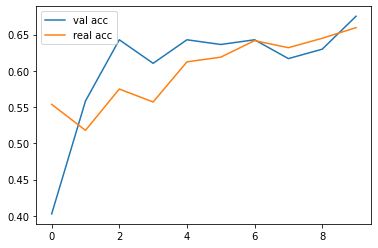

In [14]:
vloss = fit_res.history["val_accuracy"]
loss = fit_res.history["accuracy"]
plt.plot(range(10),vloss , label="val acc")
plt.plot(range(10),loss  , label="real acc")
plt.legend()
plt.show()


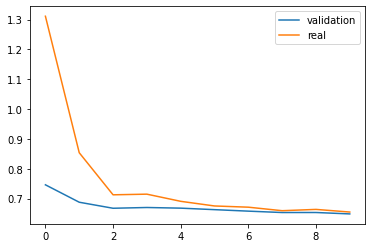

In [15]:
vloss = fit_res.history["val_loss"]
loss = fit_res.history["loss"]
plt.plot(range(10),vloss , label="validation")
plt.plot(range(10),loss  , label="real")
plt.legend()
plt.show()


# 예측

In [16]:
# test = pd.read_csv("test.csv")
# pred = model.predict(test)

# sub = pd.read_csv("submit.csv")
# sub["target"] = pred
# sub.to_csv("lkh.csv", index=False)